100%|████████████████████████████████████████████████████████████████████████████████| 226/226 [00:16<00:00, 13.74it/s]

Epoch 1/100


6/6 [==============================] - 0s 23ms/step - loss: 8.7779 - mean_absolute_error: 1.8404 - val_loss: 2.1827 - val_mean_absolute_error: 1.1465
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 4.8070 - mean_absolute_error: 1.8109 - val_loss: 2.2602 - val_mean_absolute_error: 1.4433
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 2.6917 - mean_absolute_error: 1.2131 - val_loss: 0.4658 - val_mean_absolute_error: 0.4036
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 1.4018 - mean_absolute_error: 0.6090 - val_loss: 0.9656 - val_mean_absolute_error: 0.6790
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 1.2790 - mean_absolute_error: 0.7859 - val_loss: 0.4879 - val_mean_absolute_error: 0.6209
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0161 - mean_absolute_error: 0.7850 - val_loss: 0.4144 - val_mean_absolute_error: 0.5287
Epoch 7/100
6/6 [============================

Epoch 52/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0951 - mean_absolute_error: 0.2088 - val_loss: 0.0983 - val_mean_absolute_error: 0.2307
Epoch 53/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0914 - mean_absolute_error: 0.2063 - val_loss: 0.0532 - val_mean_absolute_error: 0.1843
Epoch 54/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0989 - mean_absolute_error: 0.2046 - val_loss: 0.0901 - val_mean_absolute_error: 0.2180
Epoch 55/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0989 - mean_absolute_error: 0.1982 - val_loss: 0.0677 - val_mean_absolute_error: 0.1888
Epoch 56/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0902 - mean_absolute_error: 0.1995 - val_loss: 0.0613 - val_mean_absolute_error: 0.1817
Epoch 57/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0959 - mean_absolute_error: 0.2034 - val_loss: 0.0739 - val_mean_absolute_error: 0.1986
Epoch 58/100
6/6 [==========

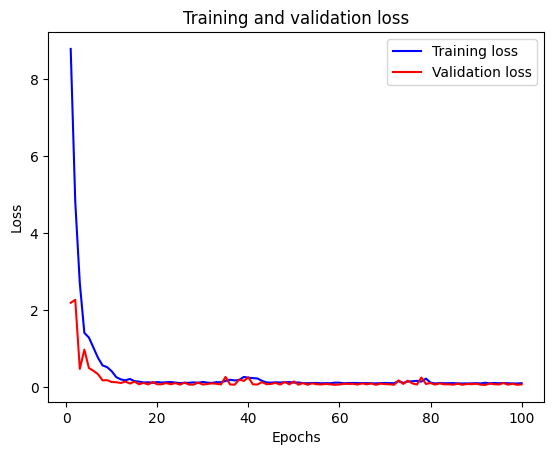

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow.keras.utils as image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from skimage import color
import cv2
# Load input data
csv_file = r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\image_feature.csv'
df = pd.read_csv(csv_file)

df_image = []
image_width = 60
image_height = 60
for i in tqdm(range(df.shape[0])):
    img = cv2.imread(r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\'+df['img_id'][i]+'.jpg')
    img = cv2.resize(img, (image_width, image_height))
    left = int(image_width*0.4)
    top = int(image_height*0.4)
    right = int(image_width*0.6)
    bottom = int(image_height*0.6)
    img = img[left:right, top:bottom]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img1 = image.img_to_array(img)
    df_image.append(img1)

#plt.figure()
#plt.imshow(img) 
#plt.show()  # display it

num_channel = 3 #HSV
image_width = int(right-left)
image_height = int(bottom-top)
X = np.array(df_image)
X_col = len(df.index)
X = X.reshape(X_col, image_width, image_height, num_channel)
X /= 360

y = np.array(df['absorbance'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Define model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('MSE:', test_loss)
print('MAE:', test_acc)

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()